In [16]:
from np_to_tfrecord import np_to_tfrecords
import numpy as np
import tensorflow as tf
from SolvePossion_FD import *
import os
import json
import functools
tf.enable_eager_execution()

# Generate Data

N = 5, h = 0.25000 ---->  error = 0.008494688418465724


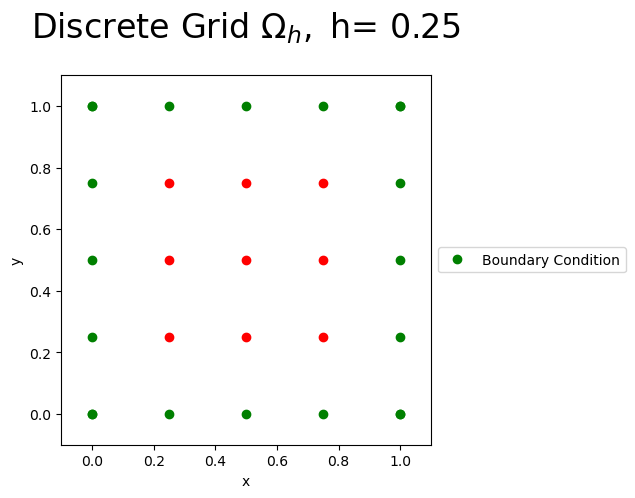

In [17]:
A,b,coordinates,errors,labels = main(5,6)

In [18]:
labels

array([[ 1.2246469e-16],
       [ 8.6595606e-17],
       [ 7.4987988e-33],
       [-8.6595606e-17],
       [-1.2246469e-16],
       [ 7.0710677e-01],
       [ 5.0000000e-01],
       [ 4.3297803e-17],
       [-5.0000000e-01],
       [-7.0710677e-01],
       [ 1.0000000e+00],
       [ 7.0710677e-01],
       [ 6.1232343e-17],
       [-7.0710677e-01],
       [-1.0000000e+00],
       [ 7.0710677e-01],
       [ 5.0000000e-01],
       [ 4.3297803e-17],
       [-5.0000000e-01],
       [-7.0710677e-01],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-0.0000000e+00],
       [-0.0000000e+00]], dtype=float32)

In [19]:
int_type = np.int64
time_steps = 3
no_of_nodes = 25
no_of_cells = 32

cells = np.ones((1,no_of_cells,3), dtype=int_type)
mesh_pos = np.ones((1,no_of_nodes,2), dtype=np.float32)
node_type = np.ones((1,no_of_nodes,1), dtype=int_type)
temperature = np.zeros((time_steps,no_of_nodes,1), dtype=np.float32)

cells[None,:,:] = np.array([
    [0, 1, 6],
    [1, 2, 7],
    [2, 3, 8],
    [3, 4, 9],
    [5, 6, 11],
    [6, 7, 12],
    [7, 8, 13],
    [8, 9, 14],
    [10, 11, 16],
    [11, 12, 17],
    [12, 13, 18],
    [13, 14, 19],
    [15, 16, 21],
    [16, 17, 22],
    [17, 18, 23],
    [18, 19, 24],
    [0, 6, 5],
    [1, 7, 6],
    [2, 8, 7],
    [3, 9, 8],
    [5, 11, 10],
    [6, 12, 11],
    [7, 13, 12],
    [8, 14, 13],
    [10, 16, 15],
    [11, 17, 16],
    [12, 18, 17],
    [13, 19, 18],
    [15, 21, 20],
    [16, 22, 21],
    [17, 23, 22],
    [18, 24, 23]
], dtype=int_type)


mesh_pos[None,:,:] = coordinates

node_type[None,:,:] = np.array([
    [6],
    [6],
    [6],
    [6],
    [6],
    [6],
    [0],
    [0],
    [0],
    [6],
    [6],
    [0],
    [0],
    [0],
    [6],
    [6],
    [0],
    [0],
    [0],
    [6],
    [6],
    [6],
    [6],
    [6],
    [6],
    
], dtype = int_type)

labels = labels.astype(np.float32)
t0 = np.array([
    [labels[0]],
    [labels[1]],
    [labels[2]],
    [labels[3]],
    [labels[4]],
    [labels[5]],
    [0],
    [0],
    [0],
    [labels[9]],
    [labels[10]],
    [0],
    [0],
    [0],
    [labels[14]],
    [labels[15]],
    [0],
    [0],
    [0],
    [labels[19]],
    [labels[20]],
    [labels[21]],
    [labels[22]],
    [labels[23]],
    [labels[24]],
    
], dtype = np.float32)

t1 = labels

temperature[1,:,:] = t0
temperature[2,:,:] = t1

In [20]:
cells

array([[[ 0,  1,  6],
        [ 1,  2,  7],
        [ 2,  3,  8],
        [ 3,  4,  9],
        [ 5,  6, 11],
        [ 6,  7, 12],
        [ 7,  8, 13],
        [ 8,  9, 14],
        [10, 11, 16],
        [11, 12, 17],
        [12, 13, 18],
        [13, 14, 19],
        [15, 16, 21],
        [16, 17, 22],
        [17, 18, 23],
        [18, 19, 24],
        [ 0,  6,  5],
        [ 1,  7,  6],
        [ 2,  8,  7],
        [ 3,  9,  8],
        [ 5, 11, 10],
        [ 6, 12, 11],
        [ 7, 13, 12],
        [ 8, 14, 13],
        [10, 16, 15],
        [11, 17, 16],
        [12, 18, 17],
        [13, 19, 18],
        [15, 21, 20],
        [16, 22, 21],
        [17, 23, 22],
        [18, 24, 23]]])

In [21]:
mesh_pos

array([[[0.  , 1.  ],
        [0.25, 1.  ],
        [0.5 , 1.  ],
        [0.75, 1.  ],
        [1.  , 1.  ],
        [0.  , 0.75],
        [0.25, 0.75],
        [0.5 , 0.75],
        [0.75, 0.75],
        [1.  , 0.75],
        [0.  , 0.5 ],
        [0.25, 0.5 ],
        [0.5 , 0.5 ],
        [0.75, 0.5 ],
        [1.  , 0.5 ],
        [0.  , 0.25],
        [0.25, 0.25],
        [0.5 , 0.25],
        [0.75, 0.25],
        [1.  , 0.25],
        [0.  , 0.  ],
        [0.25, 0.  ],
        [0.5 , 0.  ],
        [0.75, 0.  ],
        [1.  , 0.  ]]], dtype=float32)

In [22]:
node_type

array([[[6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [0],
        [0],
        [0],
        [6],
        [6],
        [0],
        [0],
        [0],
        [6],
        [6],
        [0],
        [0],
        [0],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6]]])

In [23]:
temperature

array([[[ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00]],

       [[ 1.2246469e-16],
        [ 8.6595606e-17],
        [ 7.4987988e-33],
        [-8.6595606e-17],
        [-1.2246469e-16],
        [ 7.0710677e-01],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [-7.0710677e-01],
        [ 1.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 

In [24]:
print('cells_shape', cells.shape, 'cells_dtype ', cells.dtype)
print('mesh_pos', mesh_pos.shape, 'mesh_pos_dtype ', mesh_pos.dtype)
print('node_type', node_type.shape, 'node_type_dtype ', node_type.dtype)
print('temperature', temperature.shape, 'temperature_dtype ', temperature.dtype)
#print('temperature', len(temperature), 'temperature_dtype ', type(temperature))

cells_shape (1, 32, 3) cells_dtype  int64
mesh_pos (1, 25, 2) mesh_pos_dtype  float32
node_type (1, 25, 1) node_type_dtype  int64
temperature (3, 25, 1) temperature_dtype  float32


# Write TF Record File 

In [25]:
def np_to_tfrecords(data, output_file):
    
    # write records to a tfrecords file
    writer = tf.io.TFRecordWriter(output_file)
    
    for i in range(len(data['temperature'])):
        feature = {}
        # Loop through all the features you want to write
        for name, value in data.items():
#           if name=='temperature':
#               value = value[i]
          # Feature contains a map of string to feature proto objects
          if value.dtype == "float32":
            #feature[name] = tf.train.Feature(float_list=tf.train.FloatList(value=value.flatten()))
            feature[name] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.flatten().tobytes()]))
          elif value.dtype == "int32" or value.dtype == "int64":
            #feature[name] = tf.train.Feature(int64_list=tf.train.Int64List(value=value.flatten()))
            feature[name] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.flatten().tobytes()]))
          else:
              raise ValueError('invalid data format: '+str(value.dtype))
        
        # Construct the Example proto object
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        # print(example)
    
        # Serialize the example to a string
        serialized = example.SerializeToString()
    
        # write the serialized objec to the disk
        writer.write(serialized)
    writer.close()

In [26]:
import random
random.seed(1)

In [27]:
data = {
    'cells':cells,
    'mesh_pos':mesh_pos,
    'node_type':node_type,
    'temperature':temperature
}

file_path = "/gpfs/u/scratch/ODLC/ODLCsfsh/deepmind-research_soha/meshgraphnets/data/cylinder_flow/train.tfrecord"
os.remove(file_path)
np_to_tfrecords(data, file_path)

# Read TF Record file

In [28]:
# def parse(proto,meta):
#     return tf.parse_single_example(proto, features={
#        'cells': tf.FixedLenFeature([1,32,3], tf.int64, default_value=tf.zeros((1,32,3),dtype=tf.int64)),
#        'mesh_pos': tf.FixedLenFeature([1,25,2], tf.float32, default_value=tf.zeros((1,25,2),dtype=tf.float32)),
#        'node_type': tf.FixedLenFeature([1,25,1], tf.int64, default_value=tf.zeros((1,25,1),dtype=tf.int64)),
#        'temperature': tf.FixedLenFeature([2,25,1], tf.float32, default_value=tf.zeros((2,25,1),dtype=tf.float32)),
#    })

# def parse(proto,meta):
#     return tf.parse_single_example(proto, features={
#        'cells': tf.io.VarLenFeature(tf.int64),
#        'mesh_pos': tf.io.VarLenFeature(tf.float32),
#        'node_type': tf.io.VarLenFeature(tf.int64),
#        'temperature': tf.io.VarLenFeature(tf.float32)
#    })


def parse(proto,meta):
    features = tf.parse_single_example(proto, features={
       'cells': tf.io.VarLenFeature(tf.int64),
       'mesh_pos': tf.io.VarLenFeature(tf.float32),
       'node_type': tf.io.VarLenFeature(tf.int64),
       'temperature': tf.io.VarLenFeature(tf.float32)
    })
    out = {}
    print(features['temperature'].shape)
    for key, field in meta['features'].items():
        data = features[key].values
        data = tf.reshape(data, field['shape'])
        if field['type'] == 'static':
            data = tf.tile(data, [meta['trajectory_length'], 1, 1])
        elif field['type'] != 'dynamic':
            raise ValueError('invalid data format')
        out[key]=data
    
    return out

def _parse_function(proto, meta):
  keys_to_features = {}
  for key, feature in meta["features"].items():
        data = tf.io.FixedLenFeature(feature["shape"], getattr(tf, feature['dtype']))
        keys_to_features[key] = data
#         if key=='temperature':
#             data = tf.io.FixedLenFeature([1,25,1], getattr(tf, feature['dtype']))
#         else:
            
  parsed_features = tf.io.parse_single_example(proto, keys_to_features)
  out = {}
  for key, feature in meta["features"].items():
      data = parsed_features[key]
      if feature['type'] == 'static':
          data = tf.tile(data, [meta['trajectory_length'], 1, 1])
      elif feature['type'] != 'dynamic':
          raise ValueError('invalid data format')
      out[key] = data
  return out


def _parse(proto, meta):
  """Parses a trajectory from tf.Example."""
  feature_lists = {k: tf.io.VarLenFeature(tf.string)
                   for k in meta['field_names']}
  features = tf.io.parse_single_example(proto, feature_lists)
  out = {}
  for key, field in meta['features'].items():
    data = tf.io.decode_raw(features[key].values, getattr(tf, field['dtype']))
    data = tf.reshape(data, field['shape'])
    if field['type'] == 'static':
      data = tf.tile(data, [meta['trajectory_length'], 1, 1])
    elif field['type'] == 'dynamic_varlen':
      length = tf.io.decode_raw(features['length_'+key].values, tf.int32)
      length = tf.reshape(length, [-1])
      data = tf.RaggedTensor.from_row_lengths(data, row_lengths=length)
    elif field['type'] != 'dynamic':
      raise ValueError('invalid data format')
    out[key] = data
  return out

In [29]:
def load_dataset(path, split):
  """Load dataset."""
  with open(os.path.join(path, 'meta.json'), 'r') as fp:
    meta = json.loads(fp.read())
  ds = tf.data.TFRecordDataset(os.path.join(path, split+'.tfrecord'))
  print('ds: ',ds)
  ds = ds.map(functools.partial(_parse, meta=meta), num_parallel_calls=8)
  # ds = ds.prefetch(1)
  return ds

In [30]:
split = "train"
dataset = load_dataset(file_path, split)

NotADirectoryError: [Errno 20] Not a directory: '/gpfs/u/scratch/ODLC/ODLCsfsh/deepmind-research_soha/meshgraphnets/data/cylinder_flow/train.tfrecord/meta.json'

In [ ]:
iterator = iter(dataset)

positions = next(iterator)
print()
print(positions)
arrays = [np.array(positions[item]) for item in positions]
for array in arrays:
    print(array.shape)